In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [10]:
df = pd.read_excel('202501.xlsx')

In [11]:
# 시간 컬럼 datetime 변환
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])

In [13]:
# 금속 컬럼 선택 (단위가 ng/m3인 컬럼만)
metal_columns = [col for col in df.columns if '(ng/m3)' in col]

In [27]:
# 날짜 분할 (7일 단위로)
unique_dates = df['Pump-Begin'].dt.date.unique()
chunks = [unique_dates[i:i+11] for i in range(0, len(unique_dates), 11)]

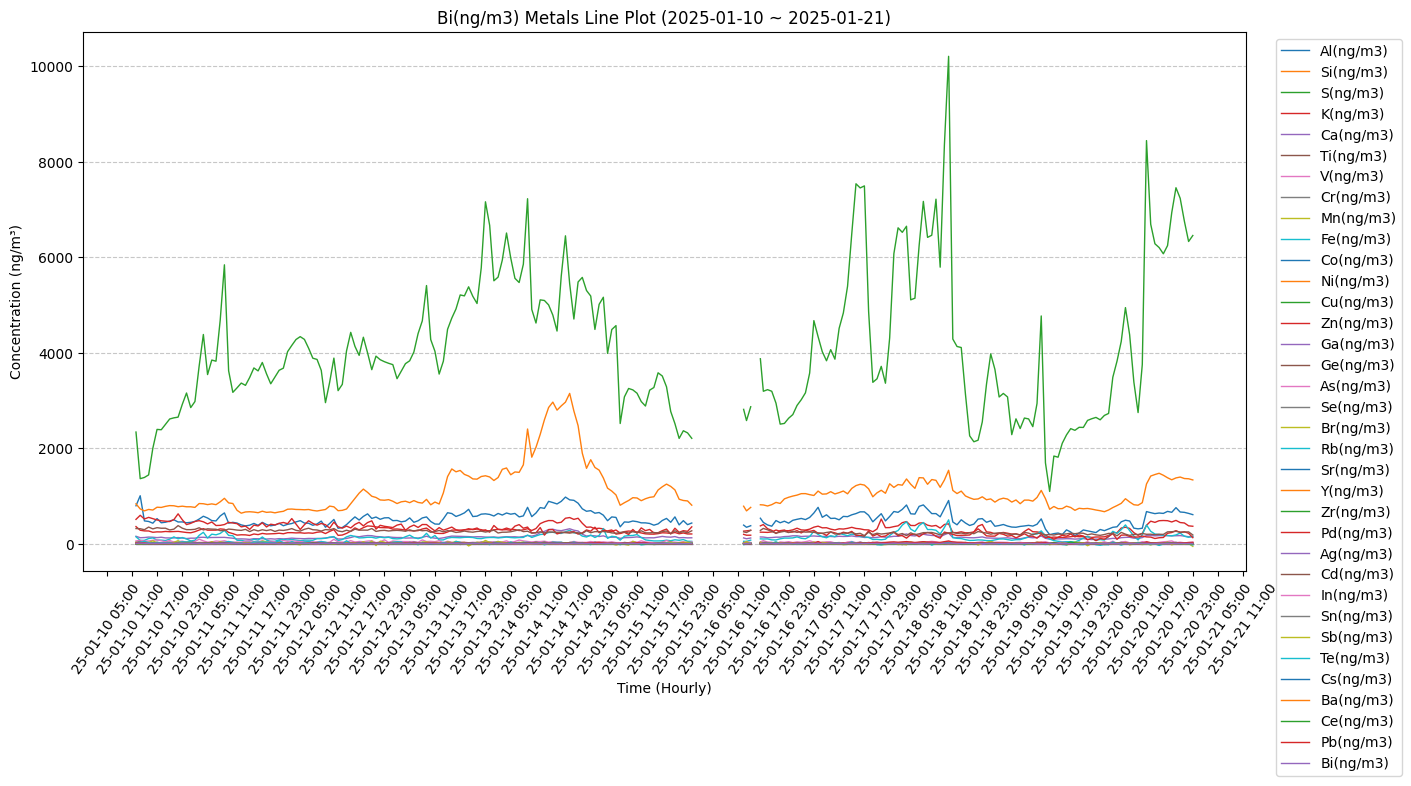

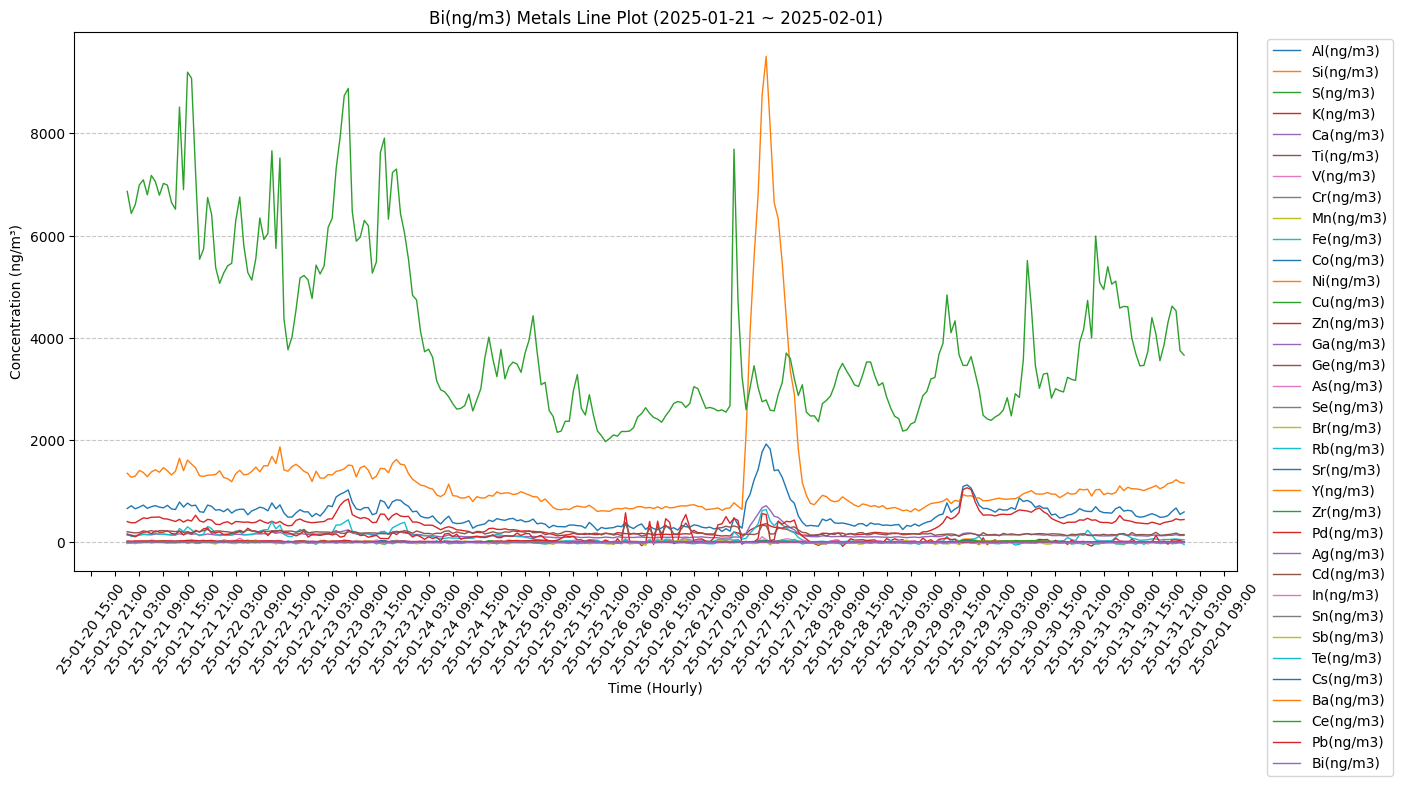

In [28]:
# 개별 금속 선그래프 생성
for date_group in chunks:
    start_date = pd.to_datetime(min(date_group))
    end_date = pd.to_datetime(max(date_group)) + pd.Timedelta(days=1)

    temp_df = df[(df['Pump-Begin'] >= start_date) &
                 (df['Pump-Begin'] < end_date)].copy()
    temp_df = temp_df.sort_values('Pump-Begin')

    plt.figure(figsize=(15, 7))

    # 모든 금속 자동 라인 플롯
    for metal in metal_columns:
        plt.plot(temp_df['Pump-Begin'], temp_df[metal], label=metal, linewidth=1)

    # X축 설정 (3시간 간격)
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M'))
    plt.xticks(rotation=55)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.grid(axis='x', visible=False)

    plt.xlabel('Time (Hourly)')
    plt.ylabel('Concentration (ng/m³)')
    plt.title(f'{metal} Metals Line Plot ({start_date.date()} ~ {end_date.date()})')

    # 범례 설정
    plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1)

    # 그래프 출력
    plt.tight_layout
    plt.show()